In [115]:
from astropy import constants as const
print(const.c.value)   
from astropy import cosmology
from astropy.cosmology import Planck15 as cosmo
from astropy import units as u
import matplotlib.pyplot as plt
import numpy as np



299792458.0


In [117]:
class redshift:
    def __init__(self, name,z, obs_wavelength, rest_wavelength):
        self.name = name
        self.z = z
        self.obs_wavelength = obs_wavelength* u.angstrom
        self.rest_wavelength = rest_wavelength* u.angstrom
        

    def velocity_optical(self):
        velocity = const.c * self.z
        return velocity.to(u.km/u.s)
        
    def velocity_relative(self):
       z = self.z
       v = const.c* ((1+z)**2 - 1) / ((1+z)**2 + 1)
       return v.to(u.km/u.s)

    def Hubble_law(self):
        H = cosmo.H0
        calculated_dist = (self.velocity_optical() / H).to(u.Mpc)
        return calculated_dist

    def accurate_dist(self):
        
        accurate_distance = cosmo.luminosity_distance(abs(self.z))
        return accurate_distance 


andromeda = redshift("Andromeda galaxy",-0.001, 6562.0, 6562.8)
antennae = redshift("Antennae galaxy" , 0.0056, 6584.0 ,6562.8)

Andromeda_data = {
    "optical velocity" : andromeda.velocity_optical(),
    "relative velocity" : andromeda.velocity_relative(),
    "Hubble distance" : andromeda.Hubble_law(),
    "Accurate distance": andromeda.accurate_dist()
    
}
# print("Andromeda Galaxy Analysis:")
# print("=" * 40)
# for key, value in Andromeda_data.items():
#     print(f"{key}: {value}")
    
Antennae_data = {
    "optical velocity" : antennae.velocity_optical(),
    "relative velocity" : antennae.velocity_relative(),
    "Hubble distance" : antennae.Hubble_law(),
    "Accurate distance": antennae.accurate_dist()
}
        
# to compare them the two galaxies

class Analyser:
    def __init__(self,galaxy_1, galaxy_2):
        self.galaxy_1 = galaxy_1
        self.galaxy_2 = galaxy_2

        def comparison(self):
        
            if abs(self.galaxy_1.velocity_relative())> abs(self.galaxy_2.velocity_relative()):
                print(f" {galaxy_1} is moving faster relative to earth than {galaxy_2}")
            else:
                print(f" {galaxy_2} is moving faster relative to earth than {galaxy_1}")
             
            if self.galaxy_1.accurate_dist() > self.galaxy_2.accurate_dist():
                print(f" {galaxy_1} is farther away from earth than {galaxy_2}")
            else:
                print(f" {galaxy_2} is farther away from  earth than {galaxy_1}")
                           
final_analysis = Analyser(andromeda, antennae)                

        
    


In [119]:
import pandas as pd

comparison_data = {
    "Galaxy": ["Andromeda", "Antennae"],
    "Redshift": [andromeda.z, antennae.z],
    "Optical Velocity (km/s)": [
        Andromeda_data["optical velocity"].value,
        Antennae_data["optical velocity"].value
    ],
    "Relativistic Velocity (km/s)": [
        Andromeda_data["relative velocity"].value,
        Antennae_data["relative velocity"].value
    ],
    "Hubble Distance (Mpc)": [
        Andromeda_data["Hubble distance"].value,
        Antennae_data["Hubble distance"].value
    ],
    "Accurate Distance (Mpc)": [
        Andromeda_data["Accurate distance"].value,
        Antennae_data["Accurate distance"].value
    ]
}

df = pd.DataFrame(comparison_data)
print("\nDetailed Comparison Table:")
print(df.to_string(index=False, float_format="%.3f"))


Detailed Comparison Table:
   Galaxy  Redshift  Optical Velocity (km/s)  Relativistic Velocity (km/s)  Hubble Distance (Mpc)  Accurate Distance (Mpc)
Andromeda    -0.001                 -299.792                      -299.942                 -4.426                    4.429
 Antennae     0.006                 1678.838                      1674.137                 24.784                   24.890


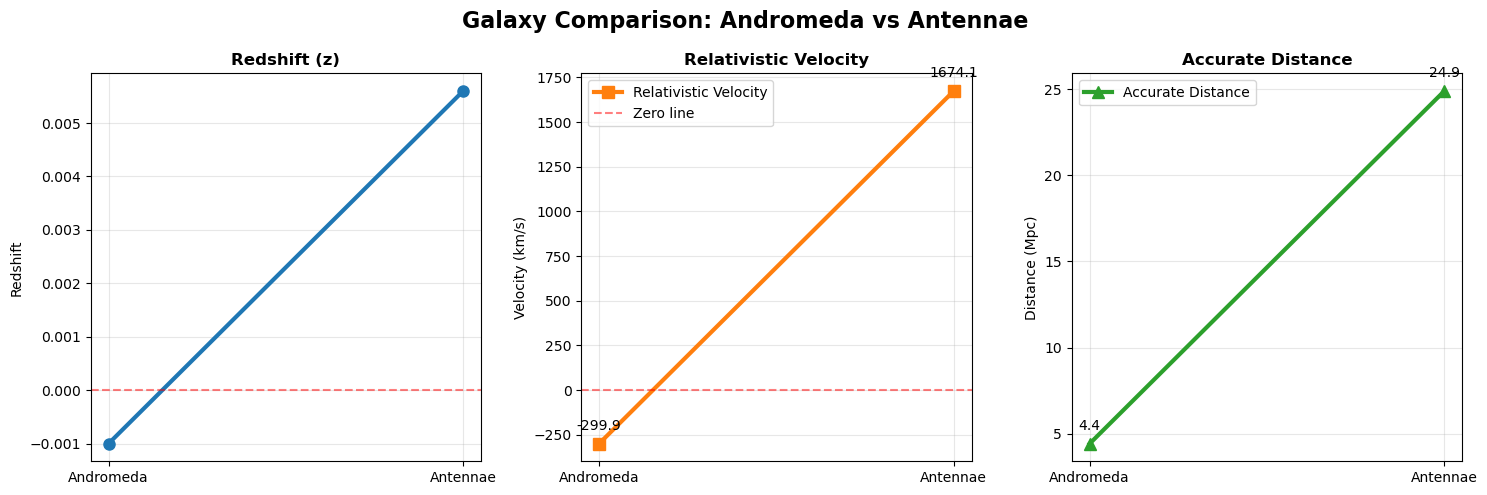

In [132]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Galaxy Comparison: Andromeda vs Antennae', fontsize=16, fontweight='bold')

galaxies = comparison_data["Galaxy"]
x_pos = np.arange(len(galaxies))


ax1 = axes[0]
ax1.plot(x_pos, comparison_data["Redshift"], marker='o', linewidth=3, markersize=8, color='#1f77b4', label='Redshift')
ax1.set_title('Redshift (z)', fontweight='bold')
ax1.set_ylabel('Redshift')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(galaxies)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Zero line')

for i, value in enumerate(comparison_data["Redshift"]):
    ax1.annotate(f'{value:.4f}', (i, value), textcoords="offset points", xytext=(0,10), ha='center')
ax1.legend()


ax2 = axes[1]
ax2.plot(x_pos, comparison_data["Relativistic Velocity (km/s)"], marker='s', linewidth=3, markersize=8, color='#ff7f0e', label='Relativistic Velocity')
ax2.set_title('Relativistic Velocity', fontweight='bold')
ax2.set_ylabel('Velocity (km/s)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(galaxies)
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Zero line')

for i, value in enumerate(comparison_data["Relativistic Velocity (km/s)"]):
    ax2.annotate(f'{value:.1f}', (i, value), textcoords="offset points", xytext=(0,10), ha='center')
ax2.legend()


ax3 = axes[2]
ax3.plot(x_pos, comparison_data["Accurate Distance (Mpc)"], marker='^', linewidth=3, markersize=8, color='#2ca02c', label='Accurate Distance')
ax3.set_title('Accurate Distance', fontweight='bold')
ax3.set_ylabel('Distance (Mpc)')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(galaxies)
ax3.grid(True, alpha=0.3)

for i, value in enumerate(comparison_data["Accurate Distance (Mpc)"]):
    ax3.annotate(f'{value:.1f}', (i, value), textcoords="offset points", xytext=(0,10), ha='center')
ax3.legend()

plt.tight_layout()
plt.show()